In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
import seaborn as sns
import matplotlib.cm as cm

In [2]:
#calculate TSP
vol_D2O_TSP_uL = 5
total_vol_uL = 600
uL_to_L = 1e-6
D2O_density = 1.11 # 1 g/mL = 1 mg/uL
D2O_TSP_mg = vol_D2O_TSP_uL * D2O_density
TSP_wt_frac = 0.75/100
TSP_Mw = 172.27
TSP_mmol = TSP_wt_frac * D2O_TSP_mg / TSP_Mw
TSP_mM = TSP_mmol / (total_vol_uL * uL_to_L)
print('TSP:', '%.2f' % TSP_mM, 'mM')

TSP: 0.40 mM


In [3]:
time_step = 5 #min

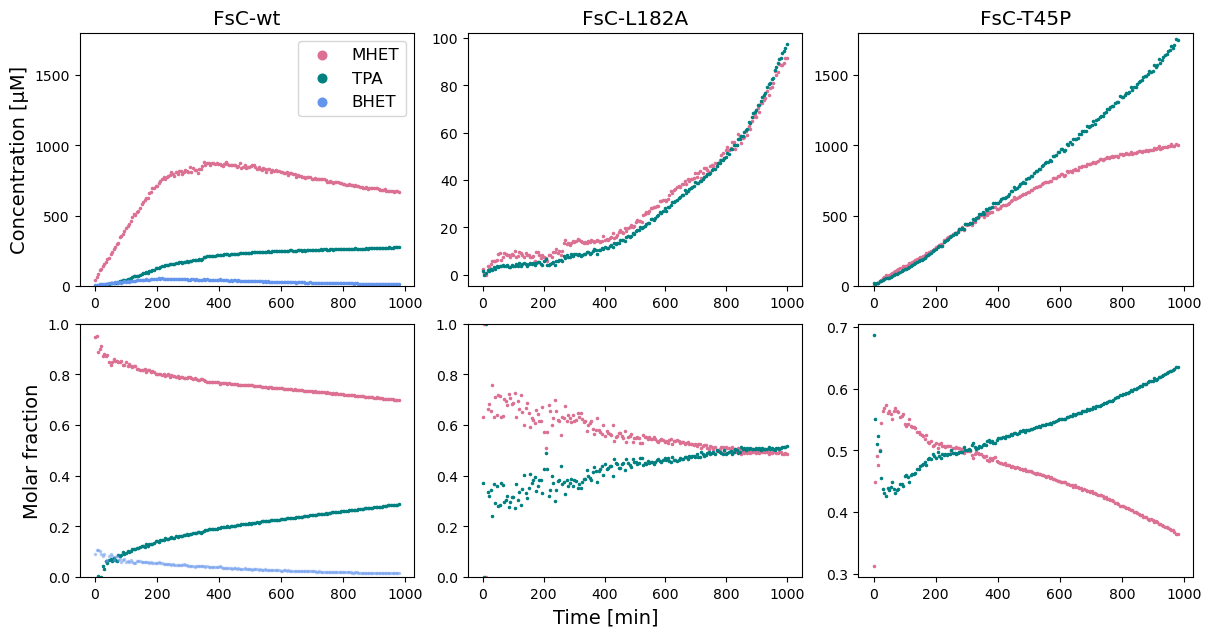

In [4]:
fig, axs = plt.subplots(2,3, constrained_layout=True, figsize=(12,6))
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.size"] = 12
size=2.4
c1 = 'palevioletred'
c2 = 'teal'
c3 = 'cornflowerblue'


#wildtype FsC
data = np.loadtxt('137_pH6p5_TSP.txt', delimiter=';', usecols=(1,2,3,4,5))
time = np.linspace(0,len(data)*time_step, num=len(data), dtype=int)
TSP = (data[:,4]/9)
BHET_1 = 1e3 * TSP_mM * (data[:,0]/4)/TSP
MHET_1 = 1e3 * TSP_mM * ((data[:,1] + data[:,2])/4)/TSP
TPA_1 = 1e3 * TSP_mM * (data[:,3]/4)/TSP


axs[0,0].scatter(time,MHET_1, color=c1, s=size, label='MHET')
axs[0,0].scatter(time, TPA_1, s=size, color=c2, label='TPA')
axs[0,0].scatter(time,BHET_1,s=size, color=c3, label='BHET')


axs[0,0].set_title('FsC-wt')
axs[0,0].set_ylim(0,1800)
axs[0,0].legend(loc='best', markerscale=4)
axs[0,0].set_ylabel(r'Concentration [µM]', fontsize='14')

axs[1,0].scatter(time,MHET_1/(MHET_1+TPA_1+BHET_1), color=c1, s=size)
axs[1,0].scatter(time, TPA_1/(MHET_1+TPA_1+BHET_1), s=size, color=c2)
axs[1,0].scatter(time,BHET_1/(MHET_1+TPA_1+BHET_1),s=size, color=c3, alpha=0.4)
axs[1,0].set_ylim(0,1)
axs[1,0].set_ylabel(r'Molar fraction', fontsize='14')

#FsC-L182A
data2 = np.loadtxt('148_pH6p5_L182A_TSP.txt', delimiter=';', usecols=(1,2,3,4))
time = np.linspace(0,len(data2)*time_step, num=len(data2), dtype=int)
TSP = (data2[:,3]/9)
MHET_2 = 1e3 * TSP_mM * ((data2[:,0] + data2[:,1])/4)/TSP
TPA_2 = 1e3 * TSP_mM * (data2[:,2]/4)/TSP
MHET_2 = MHET_2 - MHET_2.min()
TPA_2 = TPA_2 - TPA_2.min()

axs[0,1].scatter(time,MHET_2, color=c1, s=size, label='MHET')
axs[0,1].scatter(time, TPA_2, s=size, color=c2, label='TPA')
axs[0,1].set_title('FsC-L182A')
#axs[0,1].set_ylim(0,105)

axs[1,1].scatter(time,MHET_2/(MHET_2+TPA_2), color=c1, s=size)
axs[1,1].scatter(time, TPA_2/(MHET_2+TPA_2), s=size, color=c2)
axs[1,1].set_ylim(0,1)

#FsC-T45P
data3 = np.loadtxt('integrals_60_T45P.txt', delimiter=';', usecols=(1,2,3,4))
time = np.linspace(0,len(data3)*time_step, num=len(data3), dtype=int)
TSP = (data3[:,3]/9)
MHET_3 = 1e3 * TSP_mM * ((data3[:,0] + data3[:,1])/4)/TSP
TPA_3 = 1e3 * TSP_mM * (data3[:,2]/4)/TSP

axs[0,2].scatter(time,MHET_3, color=c1, s=size, label='MHET')
axs[0,2].scatter(time, TPA_3, s=size, color=c2, label='TPA')
axs[0,2].set_title('FsC-T45P')
axs[0,2].set_ylim(0,1800)

axs[1,2].scatter(time,MHET_3/(MHET_3+TPA_3), color=c1, s=size)
axs[1,2].scatter(time, TPA_3/(MHET_3+TPA_3), s=size, color=c2)
#axs[1,2].set_ylim(0,1)
fig.text(0.5, -0.03, r'Time [min]', fontsize='14', ha='center')

plt.savefig('Timeresolved_PET.png', dpi=300)
plt.show()


In [5]:
def change_units(y, MW): #y=yield in mM, MW=MW enzyme
    c_enzyme=1e-6
    V=600e-6
    n_enzyme=c_enzyme*V
    m_enzyme=MW*n_enzyme
    n_product=y*V*1e-6
    newunit=n_product*1e3/m_enzyme #unit is umol/(g enzyme)
    return newunit
    
MW = 22258

In [8]:
#Find the product yields
#Output unit is mM
#Total yield is TPA-equivalents

#FsC wt
MHETyield_wt=MHET_1[-1]-MHET_1[0]
TPAyield_wt=TPA_1[-1]-TPA_1[0]
BHETyield_wt=BHET_1[-1]-BHET_1[0]

yield_wt=MHETyield_wt+TPAyield_wt+2*BHETyield_wt 
yield_wt=change_units(yield_wt, MW)
print('FsC wt yields: MHET: %s, TPA: %s, Total: %s' %(MHETyield_wt, TPAyield_wt, yield_wt))

#FsC-L182A
MHETyield_L182A=MHET_2[-1]-MHET_2[0]
TPAyield_L182A=TPA_2[-1]-TPA_2[0]
yield_L182A=MHETyield_L182A+TPAyield_L182A
yield_L182A=change_units(yield_L182A, MW)
print('FsC-L182A yields: MHET: %s, TPA: %s, Total: %s' %(MHETyield_L182A, TPAyield_L182A, yield_L182A))

#FsC-T45P
MHETyield_T45P=MHET_3[-1]-MHET_3[0]
TPAyield_T45P=TPA_3[-1]-TPA_3[0]
yield_T45P=MHETyield_T45P+TPAyield_T45P 
yield_T45P=change_units(yield_T45P, MW)
print('FsC T45P yields: MHET: %s, TPA: %s, Total: %s' %(MHETyield_T45P, TPAyield_T45P, yield_T45P))



FsC wt yields: MHET: 623.8297286286062, TPA: 278.2325648655071, Total: 41.36941372891629
FsC-L182A yields: MHET: 89.25795222549188, TPA: 96.1436795810407, Total: 8.329662674388201
FsC T45P yields: MHET: 995.6725876755788, TPA: 1730.0797727085653, Total: 122.46169289173079


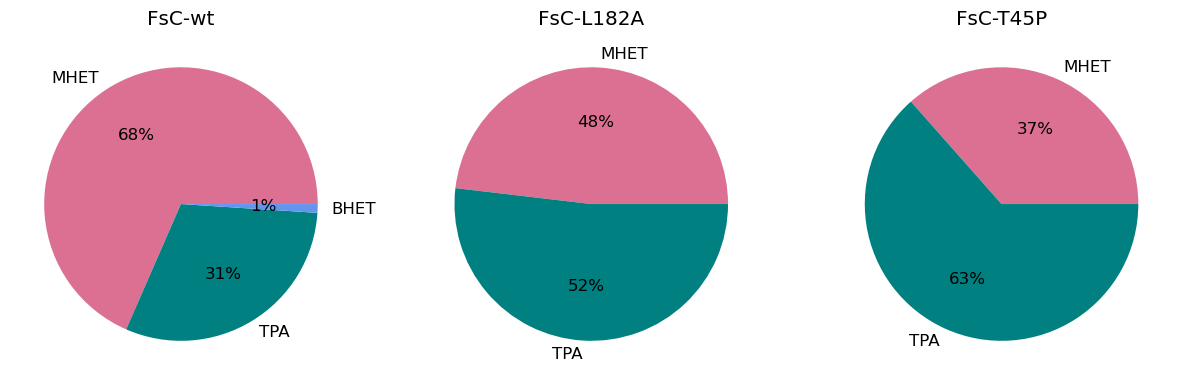

In [7]:
#slice sizes:
wt = [MHETyield_wt, TPAyield_wt, BHETyield_wt] 
L182A = [MHETyield_L182A, TPAyield_L182A] 
T45P = [MHETyield_T45P, TPAyield_T45P]  

#slice labels:
labels_1 =['MHET', 'TPA', 'BHET']  
labels_2 =['MHET', 'TPA']
colors=[c1, c2, c3]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

#wt
axs[0].pie(wt, labels=labels_1, autopct='%1.0f%%', colors=colors)
axs[0].set_title('FsC-wt')

#L182A
axs[1].pie(L182A, labels=labels_2, autopct='%1.0f%%', colors=colors)
axs[1].set_title('FsC-L182A')

#T45P
axs[2].pie(T45P, labels=labels_2, autopct='%1.0f%%', colors=colors)
axs[2].set_title('FsC-T45P')

plt.savefig('Enzyme_products.png', dpi=300)
plt.show()
